$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
\newcommand{example}{\textbf{Example: }}
\newcommand{lemma}{\textbf{Lemma: }}
\newcommand{corollary}{\textbf{Corollary: }}
\newcommand{prop}{\textbf{Proposition: }}
$$

$$
\newcommand{v}{\mathbf}
\newcommand{inv}{^{-1}}
\newcommand\mat[1]{\begin{pmatrix}#1\end{pmatrix}} 
\newcommand\det[1]{\left| #1\right|} 
\newcommand\norm[1]{\lVert #1\rVert} 
\newcommand\set[1]{\left\{#1\right\}} 
\newcommand\dels[2]{\frac{\partial #1}{\partial #2}} 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Integrals

To integrate $f(x)$ from $a \leq x \leq b$, we know that we subdivide the interval into $n$ segments of size of $\Delta x =\frac{b-a}{n}$.

Then, we consider the sum of the sample points ($x_i^*$) in each interval:
$$
\sum ^n _{i=1} f(x_i^*) \Delta x
$$

When we take this limit, we get the integral:
$$
\int ^b _a f(x) dx = \lim _{n \to \infty} \sum ^n _ {i=1} f(x_i^*)\Delta x
$$

Extending this to a function of 2 variables, $f(x, y)$ where it is defined on a closed rectangle:
$$
R = [a,b] \times [c, d] = \{(x,y) \in \mathbb R^2: a \leq x \leq b, c \leq y \leq d\}
$$

Suppose that we have solid $S$ that lies above $R$ and below $f$, and we wish to find its volume.

We can do similarly, and subdividing both intervals to get $\Delta x = \frac{b-a}{m}$ and $\Delta y = \frac{d-c}{n}$.

This form subrectangles in $R$,  where we can define our (double) integral:
$$
\int \int _R f(x,y) dA = 
\lim_{m,n \to \infty} \sum ^m_{i=1} \sum ^n_{j=1} f(x^*_{ij}, y^*_{ij}) \Delta A
$$

If $f(x,y) \geq 0$ for all $(x,y) \in R$, then this integral is the volume of $S$.

$\example$

Suppose we have the function 

$$
f(x,y) = \min(3-x, 3+x, 3-y, 3+y)
$$

defined on 
$$
R = [-3, 3] \times [-3. 3]
$$

This is actually a square pyramid with lengths of 6 and height of 3.

In [2]:
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
xs, ys = np.meshgrid(xs, ys)

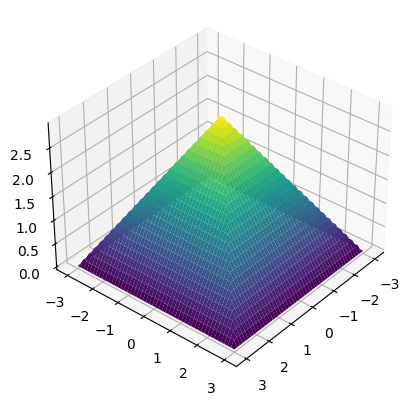

In [3]:
def f(x, y):
    return np.minimum.reduce([ 3-x, 3 + x, 3 - y, 3 + y])

ax = plt.axes(projection='3d')
zs = f(xs, ys)
ax.plot_surface(xs, ys, zs, cmap='viridis', edgecolor='none');
ax.view_init(35, 40)

In [4]:
def pyramid(n):
    a, b, c, d = -3, 3, -3 ,3
    dx = (b - a) / n
    dy = (d - c) / n
    xs = np.linspace(a, b, n, endpoint=False)
    ys = np.linspace(c, d, n, endpoint=False)
    xs, ys = np.meshgrid(xs, ys)

    ax = plt.axes(projection='3d')
    ax.bar3d(xs.ravel(), ys.ravel(), 0, dx, dy, f(xs, ys).ravel());
    ax.view_init(35, 40)

    vol = np.sum(f(xs, ys) * (dx * dy))
    ax.set_title(f"$n={n}, volume={vol}$")

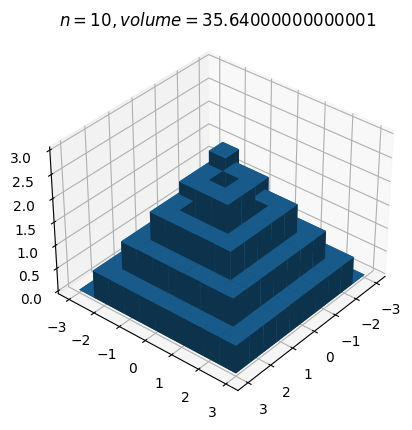

In [5]:
pyramid(10)

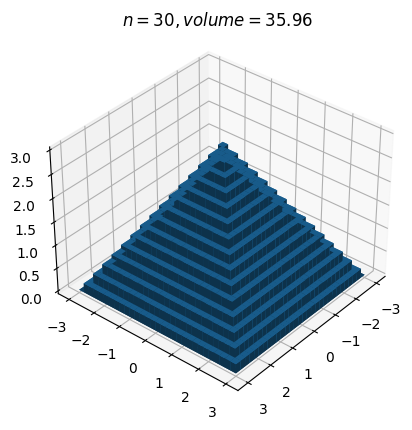

In [6]:
pyramid(30)

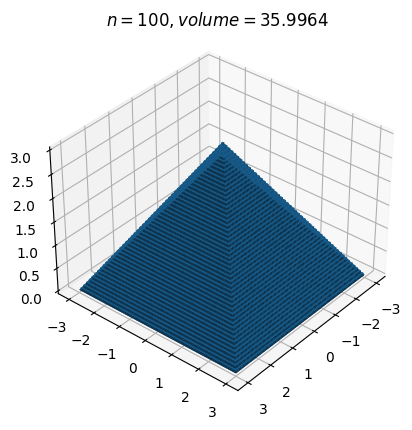

In [7]:
pyramid(100)

As we increase $n$, we get closer to the actual area of $A = \frac{l^2 h}{3} = \frac{6^2 \times 3}{3} = 36$

## Integral over general region

Our current definition only works for rectangular regions.

However, we can easily extend this to be applicable to any region $D$.

We first enclose $D$ in a rectangle $R$.

Then we define a new function:
$$
F(x,y) = \begin{cases}
f(x,y)  &\text{if } (x,y) \in D\\
0  &\text{if } (x,y) \in R \setminus D
\end{cases}
$$

Thus, we get
$$
\int \int _D f(x,y) dA = 
\int \int _R F(x,y) dA 
$$

## Linearity

Just like normal integrals, double integrals also satisfy linearity:

$$
\int \int _D \left( f(x,y) + g(x,y) \right) dA = 
\int \int _D f(x,y) dA +
\int \int _D g(x,y) dA
$$

$$
\int \int _D c f(x,y) dA = 
c\int \int _D f(x,y) dA 
$$

## Partial integration

The double integration notation seems to imply that we are apply one successive integral after another.
In fact, similar to [partial differentiation](./differential.ipynb#Partial-derivatives), we can hold one variable constant and integrate with respect to the other.

Thus, we can rewrite
$$
\int \int _R f(x,y) dA = 
\int ^b _a \left[ \int ^ d _ c f(x,y) dy \right ] dx =
\int ^b _a \int ^ d _ c f(x,y) dy dx
$$

$\theorem$ Fubini's Theorem

If $f$ is [continuous](./limits.ipynb#Continuity) in $R = [a, b] \times [c, d]$, then
$$
\int \int _R f(x,y) dA = 
\int ^b _a \int ^ d _ c f(x,y) dy dx=
\int ^d _c \int ^ b _ a f(x,y) dy dx
$$

In other words, the order of the integration doesn't matter.

## Integral over Type I/II regions

A **Type I** region lies between two continuous functions of $x$.

Formally, it is:
$$
D = \{ (x,y): a \leq x \leq b, g_1(x) \leq y \leq g_2(x)\}
$$

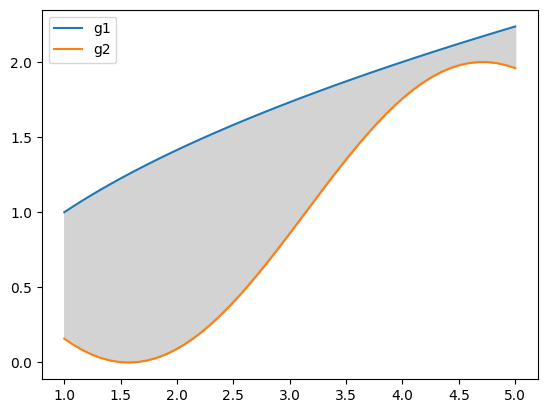

In [8]:
x = np.linspace(1, 5)
g1 = np.sqrt(x)
g2 = 1 - np.sin(x)
plt.fill_between(x, g1, g2, color="lightgrey")
plt.plot(x, g1, label="g1")
plt.plot(x, g2, label="g2")
plt.legend()
plt.show()

Informally, the "left and right edges" are straight.

---

Similarly, **Type II** region lies between two continuous functions of $y$.

Formally, it is:
$$
D = \{ (x,y): c \leq y \leq b, g_1(y) \leq x \leq g_2(y)\}
$$

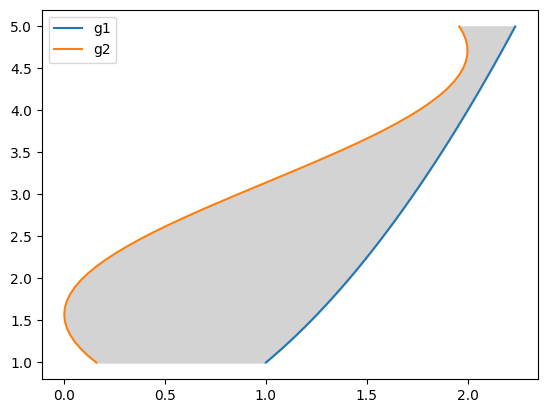

In [9]:
y = np.linspace(1, 5)
g1 = np.sqrt(y)
g2 = 1 - np.sin(y)
plt.fill_betweenx(y, g1, g2, color="lightgrey")
plt.plot(g1, y, label="g1")
plt.plot(g2, y, label="g2")
plt.legend()
plt.show()

Informally, the "top and bottom edges" are straight.

$\theorem$ 

If $f$ is a **Type I** domain then
$$
\int \int _D f(x,y) dA = 
\int ^b _a \int ^ {g_2(x)} _ {g_1(x)} f(x,y) dy dx
$$

$\theorem$ 

If $f$ is a **Type II** domain then
$$
\int \int _D f(x,y) dA = 
\int ^d _c \int ^ {g_2(y)} _ {g_1(y)} f(x,y) dx dy
$$

<div id="sphere-example" /> $\example$ 

Suppose that we wish to find the integral of $\sqrt {1 - x^2 - y^2}$ over the (circular) domain of $-1 \leq x \leq x$ and $-\sqrt{1-x^2} \leq y \leq \sqrt{1-x^2}$.

$$
\begin{align} 
\int ^ 1 _{-1} \int ^{\sqrt{1-x^2}} _{-\sqrt{1-x^2}} \sqrt{1 - x^2 - y ^2} dy dx
&= \int ^ 1 _{-1} \frac{\pi}{2}(1-x^2) dx \quad *\\
&= \frac{\pi}{2}  \left[ x - \frac{x^3}{3}\right]^ 1 _{-1}\\
&= \frac{2\pi}{3}
\end{align}
$$

$*$ _Integral is rather complicated, leaving it to [Wolfram alpha](https://www.wolframalpha.com/input?i=integrate+sqrt%281-x%5E2-y%5E2%29+dy+from+-sqrt%281-x%5E2%29+to+sqrt%281-x%5E2%29) for this._

If we examine the equation, it is actually the top-half of a [ellipsoid/sphere](./curves_and_surfaces.ipynb#Quadric-surface).

This agrees with our knowledge about volume of a sphere being $\frac{4}{3} \pi r ^3$ and thus half a sphere would be $\frac{2}{3} \pi r^3$

## Changing the order of integration

Sometimes, we can change the order of integration to make it easier.

$\example$

Given 
$$
\int ^ 3 _0 \int ^1 _{\sqrt{x/3}} e ^{y ^3} dy dx
$$

Notice that we can't really integrate $e^{y^3}$ with respect to y.

But consider the domain.

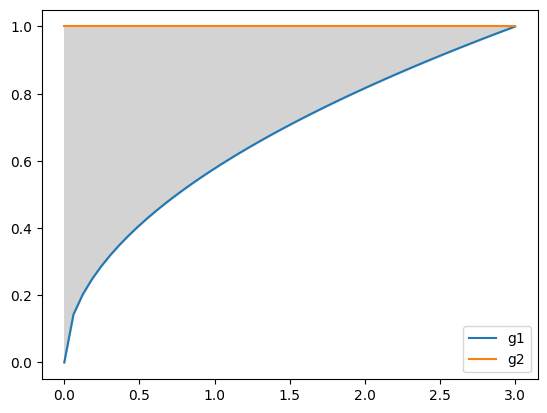

In [10]:
x = np.linspace(0, 3)
g1 = np.sqrt(x/3)
g2 = np.ones(x.shape)
plt.fill_between(x, g1, g2, color="lightgrey")
plt.plot(x, g1, label="g1")
plt.plot(x, g2, label="g2")
plt.legend()
plt.show()

Notice that even though it is defined as a Type I domain, we can also interpret it as a Type II domain, like so:

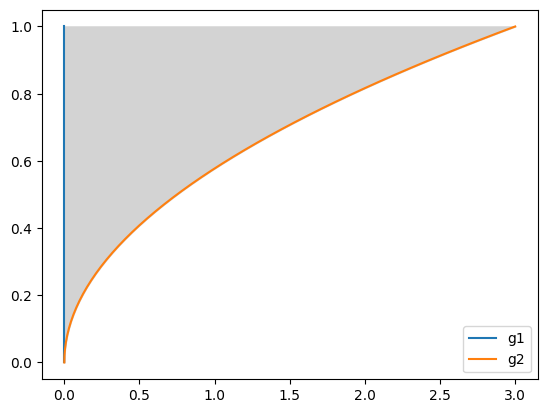

In [11]:
y = np.linspace(0, 1)
g1 = np.zeros(x.shape)
g2 = 3 * y ** 2
plt.fill_betweenx(y, g1, g2, color="lightgrey")
plt.plot(g1, y, label="g1")
plt.plot(g2, y, label="g2")
plt.legend()
plt.show()

Thus, we get

$$
\begin{align} 
\int ^ 3 _0 \int ^1 _{\sqrt{x/3}} e ^{y ^3} dy dx
&= \int ^ {x = 3} _{x = 0} \int ^{y = 1} _{y = \sqrt{x/3}} e ^{y ^3} dy dx \\
&= \int ^ {y = 1} _{y = 0} \int ^{x = 3 y ^2} _{x = 0} e ^{y ^3} dx dy \\
&= \int ^ {y = 1} _{y = 0} \left[ e ^{y ^3}x \right] ^{x=3 y ^2} _{x=0} dy \\
&= \int ^ {y = 1} _{y = 0}  e ^{y ^3}y^2 dy \\
&= \left[ \frac{e ^{y ^3}}{3} \right] ^ 1 _0  \\
&=  \frac{e - 1}{3} 
\end{align}
$$

## Area of plane

$\corollary$ The area of $D$ is
$$
A(D) = \int \int _D 1 dA
$$

## Additivity

If $D$ is a union of domains $D_1, \dots D_n$ which don't overlap, then the integral over $D$ is the sum of the integrals of $D_1, \dots , D_n$

---

## Integral in polar coordinates

In Cartesian coordinates, we describe point using $(x,y)$.

However, we can also describe the same point using **polar coordinates**, using $(r, \theta)$,
where $\theta$ describes the angle to the point from the origin along the $x$ axis and $r$ describe the straight line distance from the origin.

They have the following relationship:

$$
\begin{align}
x = r \cos \theta & \quad y = r \sin \theta\\
r^2 = x^2 + y ^2 & \quad \theta = \arctan \frac{y}{x}
\end{align}
$$

The reason we are interested in them is because _they make some regions easier to describe_.

To describe a circle of radius 1 using Cartesian domain, we get
$$
-1 \leq x \leq 1 \quad -\sqrt{1-x^2} \leq y \leq \sqrt{1-x^2}
$$

However, in polar coordinates, it is simply:
$$
0 \leq r \leq 1 \quad 0 \leq \theta \leq 2\pi
$$

### Polar rectangle

A **polar rectangle** is the region in the form of:
$$
R = \{(r, \theta): a \leq r \leq b, \alpha \leq \theta \leq \beta\}
$$

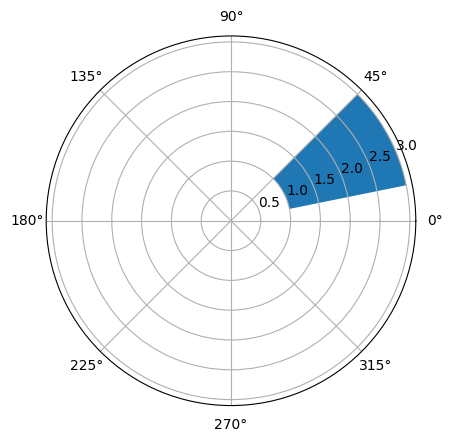

In [12]:
ax = plt.axes(projection='polar')
ts = np.linspace(0.2, np.pi / 4)
ax.fill_between(ts, 1, 3)

To compute the integral of the surface over the polar area, we perform similarly by segmenting the area into many polar rectangles.

We can approximate the area of each polar rectangle as actual rectangle, each with sides of $\Delta r$ and $r \Delta \theta$, and thus an area of $\Delta r (r \Delta \theta)$.

Hence we can define our integral as:
$$
\int \int _R f(x,y) dA \approx \sum \sum f(r \cos \theta, r \sin \theta) \Delta r(r \Delta \theta)
$$

_(Note the extra $r$ term)_

Formally, we get that:
Given a polar rectangle $R$
$$
R = \{(r, \theta): a \leq r \leq b, \alpha \leq \theta \leq \beta\}
$$

and $f$ that is continuous in $R$, then

$$
\int \int _R f(x,y) dA = 
\int ^\beta _\alpha \int ^ b _ a r f(r\cos \theta, r \sin \theta) dr d \theta
$$

$\example$

We can now revisit our [sphere example](#sphere-example).

$$
\begin{align} 
\int ^ 1 _{-1} \int ^{\sqrt{1-x^2}} _{-\sqrt{1-x^2}} \sqrt{1 - x^2 - y ^2} dy dx
&= \int ^ {2\pi} _{0} \int ^{1} _{0} r \sqrt{1 - (r \cos \theta) ^2 - (r \sin \theta) ^2} dr d\theta \\
&= \int ^ {2\pi} _{0} \int ^{1} _{0} r \sqrt{1 - r^2} dr d\theta\\
&= \int ^ {2\pi} _{0}  \left[ -\frac{1}{3}(1 - r^2)^{\frac{3}{2}} \right] ^{1} _{0}  d\theta\\ 
&= \int ^ {2\pi} _{0}   \frac{1}{3} d\theta \\
&= \frac{2\pi}{3}  
\end{align}
$$

Notice that the complicated integral disappears, hence this is a much simpler way of finding the volume of half a sphere.

Similarly, we can have type I and type II regions for polar coordinates, as follows:

$$
R = \{(r, \theta): a \leq r \leq b, g_1(r) \leq \theta \leq g_2(r)\} 
$$



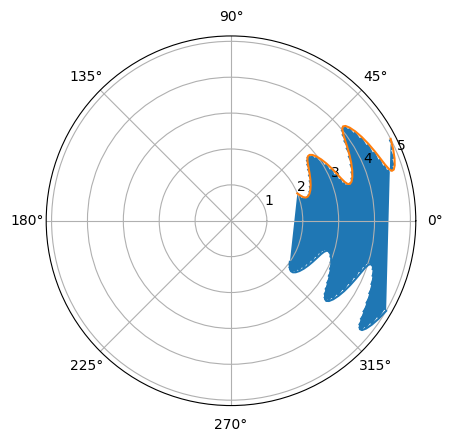

In [13]:
ax = plt.axes(projection='polar')
rs = np.linspace(2, 5)
g1 = np.sin(5 * rs) / 5 - 0.5 
g2 = np.sin(5 * rs) / 5 + 0.5 
plt.polar(g1, rs)
plt.polar(g2, rs)
ax.fill_betweenx(rs, g1, g2, interpolate=True, step='pre');

$$
R = \{(r, \theta): g_1(\theta) \leq r \leq g_2(\theta), \alpha \leq \theta \leq \beta\}
$$

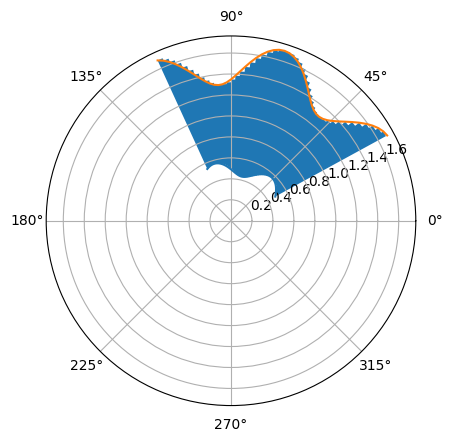

In [14]:
ax = plt.axes(projection='polar')
ts = np.linspace(0.5, 2)
g1 = np.sin(3 * rs) / 15 + 0.5 
g2 = np.sin(4 * rs) / 5 + 1.5 
plt.polar(ts, g1)
plt.polar(ts, g2)
ax.fill_between(ts, g1, g2, interpolate=True, step='pre');

## 3 variable integral

It is trivial to extend the previous concepts to 3 variables.
We will speed through this section and leave the justifications to the readers.

$\theorem$ 

If $f$ is [continuous](./limits.ipynb#Continuity) in a rectangular box $B = [a, b] \times [c, d] \times [r, s]$, then
$$
\int \int \int _B f(x,y,z) dV = 
\int ^s _r \int ^b _a \int ^ d _ c f(x,y,z) dy dx dz
$$

And once again, the integrals can be evaluated in any order.

### General region

Since if we ignore the first integral, we are left with an integral of 2 variables, 
this means that there are actually 3 types of general regions, 
each aligned to 2 out of the 3 axes.

### Cylindrical coordinates

We use **cylindrical coordinates** when evaluating our integral.

This uses polar $x,y$ coordinates, while $z$ remains as it was.

Consider a surface defined by $r = c$,
we would realize that this is actually a cylinder, hence the namesake.

$\theorem$ 

$$
\int \int \int _D f(x,y,z) dV = 
\int ^\beta _\alpha 
\int ^{h_2(\theta)} _{h_1(\theta)} 
\int ^ {u_1(r \cos \theta, r \sin \theta)} _{u_2(r \cos \theta, r \sin \theta)} 
r f(r \cos \theta, r \sin \theta, z) dz dr d\theta
$$

### Spherical coordinates

We can also incorporate $z$ into the polar system.

We let $\theta$ be the same as in cylindrical coordinates.

$\rho$ is the distance of the point from the origin.

And lastly, $\phi$ is the angle from the positive $z$ axis to the point.

$$
\begin{align}
x = \rho \sin \phi \cos \theta & \quad \rho = \sqrt{x^2 + y^2 + z^2}\\
y = \rho \sin \phi \sin \theta & \quad \theta = \arctan \frac{y}{x}\\
z = \rho \cos \phi & \quad \phi = \arccos \frac{z}{\rho}\\
\end{align}
$$

$\theorem$ 

$$
\int \int \int _D f(x,y,z) dV = 
\int ^d _c
\int ^\beta _\alpha 
\int ^a _ a
\rho^2 \sin \phi 
f(\rho \sin \phi \cos \theta,
\rho \sin \phi \sin \theta,
\rho \cos \phi,
) dz dr d\theta
$$

## Plane Transformation

Suppose that we have domain $S$ and $R$.

A **plane transformation** $T: S \to R$ is a differentiable map whose (local) inverse is differentiable.

In order words, this is the general definition of what we're doing when we use [polar coordinates](#Integral-in-polar-coordinates) and [spherical coordinates](#Spherical-coordinates)

For example, the polar coordinates to Cartesian coordinate correspond to the following transformation:

$$
(r, \theta) \to (r \cos \theta, r \sin \theta)
$$

Now, we wish to generalize it.
Given a domain $S$, we wish to find the area of domain $R$, which is the image of $S$ under $T$.

We let $S$ be a function of $uv$ and $R$ a function of $xy$.

To analyze how the area changes, we consider a small rectangle from $S$ with area $\Delta u \Delta v$, and see how it changes under $T$.

Let the 4 corners of the rectange be $A,B,C$ and $D$, with the bottom left corner ($A$) be on $(u_0, v_0)$; we get the following identity:
$$
\begin{align*}
A &= (u_0, v_0)\\
B &= (u_0 + \Delta u, v_0)\\
C &= (u_0 + \Delta u, v_0 + \Delta v)\\
D &= (u_0, v_0 + \Delta v)
\end{align*}
$$

We denote $A' = T(A)$ and similary for $B,C,D$.

Let $\v a$ and $\v b$ be the vectors $A' D' $ and $A' B'$.

$$
\begin{align*}
\v a &= T(u_0 + \Delta u, v_0) - T(u_0, v_0) \\\
\v b &= T(u_0, v_0 + \Delta v) - T(u_0, v_0)
\end{align*}
$$

If $S$ is small enough, so is $R$, and hence
$$
\text{Area of } R \approx \norm {\v a \times \v b}
$$

Also, by definition of [partial derivatives](differential.ipynb#Partial-derivatives), we have
$$
T_u(u_0, v_0) \approx \frac{T(u_0 + \Delta u, v_0) - T(u_0, v_0)}{\Delta u} \Rightarrow \v a \approx \Delta u T_u(u_0, v_0)
$$

Similarly, $\v b \approx \Delta v T_v(u_0, v_0)$

Therefore:

$$
\begin{align*}
\norm {\v a \times \v b}
&\approx \norm{\Delta u T_u (u_0, v_0) \times \Delta v T_v (u_0, v_0)}\\
&\approx \norm{T_u (u_0, v_0) \times T_v (u_0, v_0)\Delta u \Delta v}
\end{align*}
$$

We can treat $T$ as 2 separate functions of $uv$ that gives us $xy$;
we call these functions $x$ and $y$ respectively.

$$
\begin{align*}
T(u, v) &= \mat{x (u,v) \\ y (u,v)} \\
T_u &= \mat{x _u \\ y _u } \\
T_v &= \mat{x _v \\ y _v } \\
\end{align*}
$$

Thus,

$$
T_u \times T_v = \mat{x _u \\ y _u \\ 0} \times \mat{x _v \\ y _v \\ 0}
$$

Therefore,

$$
\norm {T_u \times T_v} = \left| x_u y_v - y_u x_v \right|
$$

And 
$$
\Delta A \approx \left| x_u y_v - y_u x_v \right| \Delta u \Delta v
$$

## Jacobian

We define the **Jacobian** as
$$
\left| \frac{\partial(x,y)}{\partial(u,v)}\right| = x_u y_v - x_v y_u
$$

Therefore, we arrive at:

$\theorem$ 
$$
\int \int _R f(x, y) dA =
\int \int _S f(x(u, v), y(u, v)) \left| \frac{\partial(x,y)}{\partial(u,v)}\right| du dv
$$

$\example$

Suppose we consider the transformation from polar coordinates.

Using, $ x = r \cos \theta, y = r \sin \theta $

We would arrive at:

$$
\begin{align*}
\left| \frac{\partial(x,y)}{\partial(r,\theta)} \right| 
&= x_r y_\theta - x_\theta y_r \\
&= \cos \theta (r \cos \theta) - (- r \sin \theta)(\sin \theta) \\
&= r \cos ^2 \theta + r \sin ^2 \theta \\
&= r
\end{align*}
$$

colloborates the existence of $r$ term in [polar coordinates](#Integral-in-polar-coordinates)

## 3D Jacobian

We can extend the logic to 3D.

$$
\begin{align*}
\left| \frac{\partial(x,y,z)}{\partial(u,v,w)}\right| = 
&= \left| \mat{
\frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} & \frac{\partial x}{\partial w} \\
\frac{\partial y}{\partial u} & \frac{\partial y}{\partial v} & \frac{\partial y}{\partial w} \\
\frac{\partial z}{\partial u} & \frac{\partial z}{\partial v} & \frac{\partial z}{\partial w} \\
}\right| 
\end{align*}
$$

$\example$

Suppose we consider the transformation from spherical coordinates.

Using, 
$
x = \rho \sin \phi \cos \theta, y = \rho \sin \phi \sin \theta, z = \rho \cos \phi
$

We would arrive at:
$$
\begin{align*}
x_\rho = \sin \phi \cos \theta \quad & 
y_\rho = \sin \phi \sin \theta \quad & 
z_\rho =  \cos \phi \\
x_\theta = -\rho \sin \phi \sin \theta \quad &
y_\theta = \rho \sin \phi \cos \theta \quad &
z_\theta = 0 \\
x_\phi = \rho \cos \phi \cos \theta \quad &
y_\phi = \rho \cos \phi \sin \theta \quad &
z_\phi = - \rho \sin \phi \\
\end{align*}
$$

$$
\begin{align*}
\left| \frac{\partial(x,y,z)}{\partial(r,\theta, \phi)}\right| 
&= \left| \cos \phi ((-\rho \sin \phi \sin \theta)(\rho \cos \phi \sin \theta) - (\rho \cos \phi \cos \theta)(\rho \sin \phi \cos \theta)) \atop
+ (- \rho \sin \phi)((\sin \phi \cos \theta)(\rho \sin \phi \cos \theta) - (\sin \phi \sin \theta)(-\rho \sin \phi \sin \theta))  \right| \\
&= \left| \cos \phi ((-\rho \sin \phi \sin \theta)(\rho \cos \phi \sin \theta) - (\rho \cos \phi \cos \theta)(\rho \sin \phi \cos \theta)) - \rho^2 \sin \phi(\sin^2 \phi) \right |\\
&= \left| \rho^2 \sin \phi (-\sin ^2 \theta\cos ^2 \phi - \cos ^2 \phi \cos ^2\theta) + (- \rho^2 \sin \phi)(\sin^2 \phi) \right| \\
&= \left| \rho^2 \sin \phi (-\cos ^2 \phi) + (- \rho^2 \sin \phi)(\sin^2 \phi) \right| \\
&= \left| -\rho^2 \sin \phi \right| \\
&= \rho^2 \sin \phi
\end{align*}
$$

which is precisely what we get when we considered [spherical coordinates](#Spherical-coordinates)

## Line Integral

A **line integral** is the integral of a function along a curve $C$ on the $xy$-plane.

We can contextualize trying to find the area of a slice of a surface.

We derive this by parametizing $C$ as a function of $x$ and $y$.
$$
R(t) = (x(t), y(t)) \quad a \leq t \leq b
$$

Then we partition $C$ and take the sum, giving us

$$
\int _C f(x, y) dS = \lim _{n \to \infty} \sum ^n _ {i=1} f(x_i^*, y_i^*)\Delta s_i
$$

where $\Delta s_i$ is the length of the arc between $x_i^*$ and $y_i^*$.

And notice that 
$$
\begin{align*}
\lim _{n \to \infty} \sum ^n _ {i=1} f(x_i^*, y_i^*)\Delta s_i
& = \lim _{n \to \infty} \sum ^n _ {i=1} f(x_i^*, y_i^*) \sqrt{x'(t_i^*)^2 + y'(t_i^*)^2} \Delta t_i \\ 
& = \int _b ^a f(x, y) \sqrt{x'^2 + y'^2} dt
\end {align*}
$$

$\example$

Suppose we a sphere with radius $1$, centered at $(0, 0)$ as the surface, with $C$ being the straight line from $(-1, 0)$ to $(1, 0)$.

$$
f(x, y) = \sqrt{1 - x^2 - y^2} \quad C = (-1 + t, 0) \quad 0 \leq t \leq 2
$$

$$
\begin{align*}
\int _C f(x, y) dt &= \int _b ^a f(x(t), y(t)) \sqrt{x'^2 + y'^2} dt \\
&= \int _0 ^2 \sqrt{1 - x^2 - y^2} \sqrt{x'^2 + y'^2} dt \\
&= \int _0 ^2 \sqrt{1 - (-1 + t)^2} \sqrt{1^2 + 0^2} dt \\
&= \int _0 ^2 \sqrt{2t - t^2} dt \\
&= \frac{1}{2} \left[ \arcsin (t-1) + (t-1) \sqrt{2t - t^2} \right]_0 ^2 \quad \text{by subtitution} \\
&= \frac{1}{2} (\frac{\pi}{2} + \frac{\pi}{2}) \\
&= \frac{\pi}{2} \\
\end{align*}
$$

Since the slice of a sphere along $C$ is a semi-circle, it agrees with our derivation of the area of the slice as $\frac{1}{2} \pi r^2 = \frac{\pi}{2}$.

## Surface integral

Going another dimension higher, now we wish to integrate a function across a surface.

We can contextualize by saying that we are given the amount of stress each point experiences,
and we wish to find the total stress exerted unto some surface.

We paremeterize our surface as:
$$
R(u, v) = (x(u, v), y(u, v), z(u, v))
$$

We subdivide our domain into rectangles, of sides $\Delta u, \Delta v$.

So our surface would be divided into patches of $S_{ij}$.

Once again, taking sample points, summing and taking the limit; we get the following

$$
\int _S f(x, y, z) dS = \lim _{n \to \infty} \sum ^m _ {i=1} \sum ^n _ {i=1} f(P_{ij}^*)\Delta S_{ij}
$$

We now need to assume that the surface is **smooth**.
Formaly, we require $R_u$ and $R_v$ be continuous and $R_u \times R_v \neq 0$ for all $u,v$ in the domain.

For any $u,v$, notice that $R_u$ and $R_v$ are tangent to the surface at the corresponding point.
Hence, they create a plane that is on the surface.

We can approximate the area of the patch by the plane that covers the patch, which has sides of $\Delta u R_u(u_i, v_j)$ and $\Delta v R_v(u_i, v_j)$.

Thus, the area of the patch is
$$
\Delta S_{ij} \approx \norm{R_u \times R_v} \Delta u \Delta v
$$

and at the limts, we have
$$
dS = \norm{R_u \times R_v} du dv = \norm{R_u \times R_v} dA
$$

Hence:
$$
\int _S f(x, y, z) dS = \int \int _D f(x(u, v), y(u, v), z(u, v)) \norm{R_u \times R_v} dA
$$

$\example$

Let us integrate the unit sphere surface over a constaint field of $1$.

$$
\begin{align*}
R &= \mat{u \sin v\\ u \cos v\\ \sqrt{1 - u^2}} \\
R_u &= \mat{\sin v\\ \cos v\\ - u (1-u^2)^{-\frac{1}{2}}} \\
R_v &= \mat{u \cos v\\ -u \sin v\\ 0} \\
R_u \times R_v &= \mat{-u \sin v (\alpha)\\ -u \cos v (\alpha)\\ -u} \quad \alpha = u (1-u^2)^{-\frac{1}{2}}\\
\norm{R_u \times R_v} &= \sqrt{u^2 \alpha^2 + u^2} \\
&= \sqrt{u^2 (1-u^2)^{-1} + u^2} \\
&= \frac{u}{\sqrt{1 - u^2}}
\end{align*}
$$

Hence:
$$
\int _S 1 dS = \int \int _D \frac{u}{\sqrt{1-u^2}} dA
= \int ^ {2\pi} _0 \int _0 ^1 \frac{u}{\sqrt{1-u^2}} du dv
= \int ^ {2\pi} _0 \left[ -\sqrt{1 - u^2}\right] _0 ^1 dv
= \int ^ {2\pi} _0 1 dv
= 2 \pi
$$

Which agrees with our known formula that the surface area of a hemi-sphere is $2 \pi r^2$.

## Explicit surfaces

Suppose that our surface was parameterized in its explicit form instead:
$$
R(x, y) = (x, y, g(x, y))
$$

Then
$$
\begin{align*}
R_x = \mat{1\\ 0\\ g_x} \quad R_y = \mat{0\\ 1\\ g_y} \\
R_x \times R_y = \mat{-g_x\\ -g_y\\ 1} \\
\norm{R_x \times R_y} = \sqrt{g_x^2 + g_y^2 + 1}
\end{align*}
$$

Hence, it simplifies to:
$$
\int _S f(x, y, z) dS = \int \int _D f(x(u, v), y(u, v), z(u, v)) \sqrt{\left(\dels{g}{x} \right)^2 + \left(\dels{g}{y} \right)^2 + 1} dA
$$